In [62]:
# starting web3 operations
import numpy as np
import json
from web3 import Web3
import time
# ganache_url = "https://ropsten.infura.io/v3/0345978e22a6431f9222c56ea1f7b6bd"
ganache_url="https://lively-dark-firefly.ropsten.quiknode.pro/e98606c11b422cb244ac923a53d36c5b7ea2c17c/"
# ganache_url ="http://127.0.0.1:8545"
web3 = Web3(Web3.HTTPProvider(ganache_url))
web3.isConnected()

True

In [63]:
# Basic web3 
# block = web3.eth.get_block('latest')
# balance_1 = web3.eth.getBalance("0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d")
# print(web3.fromWei(balance_1,'ether'))

In [44]:
abi = json.loads('[ { "constant": false, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" }, { "name": "a", "type": "uint256" }, { "name": "b", "type": "uint256" } ], "name": "sigmoid_act", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" } ], "name": "div", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "sigprint", "outputs": [ { "name": "", "type": "uint256" }, { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')
cont_address = "0x767b9Ed742515bad4b17622D562c77DC9Cb600c5"

In [45]:
contract = web3.eth.contract(address=cont_address,abi=abi)

In [46]:
#grit
account1 = "0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300"
private_key1="c00b36dc1777e7fda60ff1f55b57c3f51b18c0c16fe44724e451ed062a173d74"
account2 = "0x8883f1016E727C8fE93C1Df471f102bBbAF2B910"
private_key2="8d70f54549b5fb7c04fc016cc88c447fc81aff3af3065c696aee1b529fbc8ba5"


In [47]:
# account1 = "0x2C0c1D0dA7c537ad49b6AD3cdF0ed6db462446E9"
# private_key1="d2b80a53fd2b1a30ecbe14517a65c07858679034061f2d0d5f768518ed46a1b6"
# account2 = "0x76b717F8b07365060131752EE08242C268CFd37B"
# private_key2="a3e852bd651cf3aa5f6d863e0727519140431ae912588b351ab5f7ee02e06cac"

In [48]:
nonce = web3.eth.getTransactionCount(account1)

In [56]:
def sigfrac(x,y,a,b):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = contract.functions.sigmoid_act(
        x,y,a,b
         ).buildTransaction({
        'gas': 100000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash,timeout=1000)
    return tx_receipt.gasUsed

In [57]:
n, d = contract.functions.sigprint().call()
print("value of sigmoid is:", n/d)

value of sigmoid is: 0.2692307692307692


In [51]:
# default sigmoid from system
import math
import numpy as np
def sigmoid(x,y):
    sig = 1 / (1 + math.exp(-x/y))
    return sig

In [52]:
a_list = list(range(-20, 21))
a_val_num = np.array(a_list)
a_val_den = np.full(41,10)

In [58]:
print(a_val_num/a_val_den)

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]


In [59]:
sig_b=np.zeros(101)
for i in range(len(a_val_num)):
    sig_b[i] = sigmoid(int(a_val_num[i]),int(a_val_den[i]))
    

In [60]:
sig_e=np.zeros(41)
gasUse =[]
for i in range(len(a_val_num)):
    time.sleep(10)
    if (a_val_num[i]<0):
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]*(-1)),int(a_val_den[i])))
    else:
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]),int(a_val_den[i]))) 
    n, d = contract.functions.sigprint().call()
    
    sig_e[i] = n/d

ValueError: {'code': -32010, 'message': 'Transaction gas price supplied is too low. There is another transaction with same nonce in the queue. Try increasing the gas price or incrementing the nonce.'}

In [ ]:
# sig_b

In [ ]:
# sig_e

In [ ]:
d = np.arange(-5.0, 5.1, 0.1)
# d

In [61]:
print(sig_e)

[0.1195122  0.13054121 0.14220243 0.15476027 0.16824254 0.18267074
 0.1980594  0.21441538 0.23173743 0.25001566 0.26923077 0.28953302
 0.31032771 0.33198648 0.35443397 0.37758112 0.40132705 0.42556134
 0.45016656 0.47502083 0.47502083 0.52497916 0.54983322 0.57443616
 0.598659   0.62236629 0.64541113 0.64541113 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [17]:
print(sig_b)

[0.00669285 0.00739154 0.00816257 0.0090133  0.0099518  0.01098694
 0.01212843 0.01338692 0.01477403 0.0163025  0.01798621 0.01984031
 0.02188127 0.02412702 0.02659699 0.02931223 0.03229546 0.03557119
 0.03916572 0.04310725 0.04742587 0.05215356 0.05732418 0.06297336
 0.06913842 0.07585818 0.0831727  0.09112296 0.09975049 0.10909682
 0.11920292 0.13010847 0.14185106 0.15446527 0.16798161 0.18242552
 0.19781611 0.21416502 0.23147522 0.24973989 0.26894142 0.2890505
 0.31002552 0.33181223 0.35434369 0.37754067 0.40131234 0.42555748
 0.450166   0.47502081 0.5        0.52497919 0.549834   0.57444252
 0.59868766 0.62245933 0.64565631 0.66818777 0.68997448 0.7109495
 0.73105858 0.75026011 0.76852478 0.78583498 0.80218389 0.81757448
 0.83201839 0.84553473 0.85814894 0.86989153 0.88079708 0.89090318
 0.90024951 0.90887704 0.9168273  0.92414182 0.93086158 0.93702664
 0.94267582 0.94784644 0.95257413 0.95689275 0.96083428 0.96442881
 0.96770454 0.97068777 0.97340301 0.97587298 0.97811873 0.980159

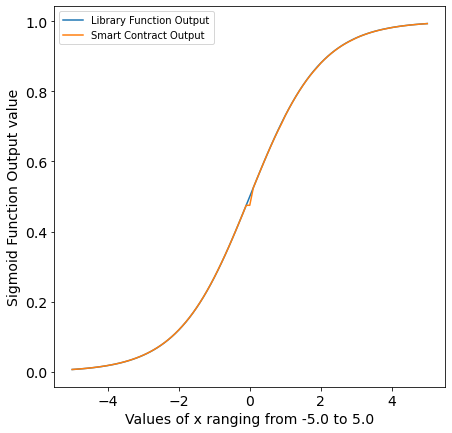

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(d, sig_b, label = "Library Function Output")
plt.plot(d, sig_e, label = "Smart Contract Output")
plt.xlabel("Values of x ranging from -5.0 to 5.0", fontsize=14)
plt.ylabel("Sigmoid Function Output value", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
# plt.title("Sigmoid Value With Smart Contract Function")
plt.legend()
plt.savefig("sigmoid_output.pdf", bbox_inches='tight')
plt.show()

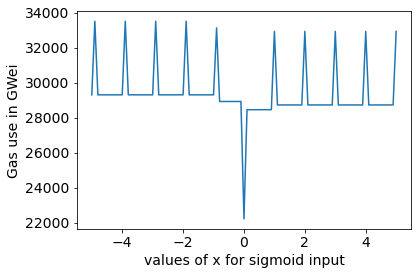

In [87]:
plt.plot(d, gasUse, label="gas Used Per Function Call")
# plt.title("Gas Consumption per sigmoid function Calls")
plt.ylabel("Gas use in GWei",fontsize=14)
plt.xlabel("values of x for sigmoid input",fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.savefig("sigmoid_gas.pdf", bbox_inches='tight')
plt.show()

